# Multivariate Regression of Excess Acid / Strength

### Author: Ash Gratton
### Date: 26 March 2025

## Introduction

This Jupyter Notebook completes a multivariate regression on two independent variables data against a correction factor used in a mass balance. A predictive equation that takes the two independent variables as inputs, to produce the correction factor, is also produced.

## Package Imports

Pandas, Numpy and Matplotlib are required packages for the regression and curve-fitting.

In [10]:
import pandas as pd

import statsmodels.api as sm

import statistics as st

import numpy as np

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

# Load Excel file from local directory.
file_path = 'Multiple regression example.xlsx'

# Export the data from Excel.
df = pd.read_excel(file_path)

In [11]:
# Print the data from Excel to show what has been loaded.
print(df.head())

   Excess        40      40.1      40.2      40.3      40.4      40.5  \
0     0.1  0.402186  0.402189  0.402192  0.402195  0.402198  0.402201   
1     0.2  0.400996  0.401002  0.401008  0.401014  0.401020  0.401026   
2     0.3  0.399813  0.399822  0.399831  0.399840  0.399848  0.399857   
3     0.4  0.398637  0.398649  0.398661  0.398672  0.398684  0.398695   
4     0.5  0.397468  0.397483  0.397497  0.397512  0.397526  0.397540   

       40.6      40.7      40.8      40.9        41  
0  0.402204  0.402207  0.402210  0.402213  0.402215  
1  0.401031  0.401037  0.401043  0.401049  0.401054  
2  0.399866  0.399874  0.399883  0.399891  0.399900  
3  0.398707  0.398718  0.398729  0.398741  0.398752  
4  0.397554  0.397568  0.397582  0.397596  0.397610  


## Data Processing

This section processes the data exported, into an X, Y, Z column format and ensures that the data type is numeric.

In [12]:
# "Melt" the data into an X, Y and Z column for processing via the regression package / line fitting.
melted_df = pd.melt(df, id_vars=['Excess'], value_vars =[40,40.1, 40.2, 40.3, 40.4, 40.5, 40.6, 40.7, 40.8, 40.9, 41])

# Rename columns accordingly.
melted_df.columns = ['Excess Acid','Conc.','Factor Value']

# Print the data to show how it has been massaged.
print(melted_df)

# Convert each value to a numeric type.
melted_df['Excess Acid'] = pd.to_numeric(melted_df['Excess Acid'], errors='coerce')
melted_df['Conc.'] = pd.to_numeric(melted_df['Conc.'], errors='coerce')
melted_df['Factor Value'] = pd.to_numeric(melted_df['Factor Value'], errors='coerce')

     Excess Acid Conc.  Factor Value
0            0.1    40      0.402186
1            0.2    40      0.400996
2            0.3    40      0.399813
3            0.4    40      0.398637
4            0.5    40      0.397468
..           ...   ...           ...
160          1.1    41      0.390897
161          1.2    41      0.389800
162          1.3    41      0.388710
163          1.4    41      0.387625
164          1.5    41      0.386546

[165 rows x 3 columns]


## Run the Regression

A multivariate linear regression is run on the data, with the results being printed out.

In [13]:
# Fit multiple linear regression model (Factor Value ~ Excess Acid + Conc.)
X = melted_df[['Excess Acid', 'Conc.']]
y = melted_df['Factor Value']

# Model below does not assume an intercept, so needs explicitly stating.
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print out the summary to see the coefficients
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Factor Value   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.572e+05
Date:                Wed, 26 Mar 2025   Prob (F-statistic):          1.30e-304
Time:                        08:49:03   Log-Likelihood:                 1356.3
No. Observations:                 165   AIC:                            -2707.
Df Residuals:                     162   BIC:                            -2697.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3943      0.001    601.605      

## Process Results & Generate Equation

Extract the coefficients from the model and print out the full form of the equation being used.

In [14]:
# Extract the coefficients of interest for the line equation from the regression.
coefficients = model.params

# Print the extracted coefficients for clarity.
print(coefficients)

# Spit out the equation to estimate the factor:
print(f'Predictive equation: Z = ' + str(coefficients[0]) + ' + (' + str(coefficients[1]) + ' * excess_acid) + (' + str(coefficients[2]) + ' * strength)')


const          0.394294
Excess Acid   -0.011323
Conc.          0.000221
dtype: float64
Predictive equation: Z = 0.39429425804814955 + (-0.011323400678249704 * excess_acid) + (0.00022072534064673018 * strength)


## Plot the Original Data in a Surface Plot

Process the results into a plot-able form for a 3D surface plot.

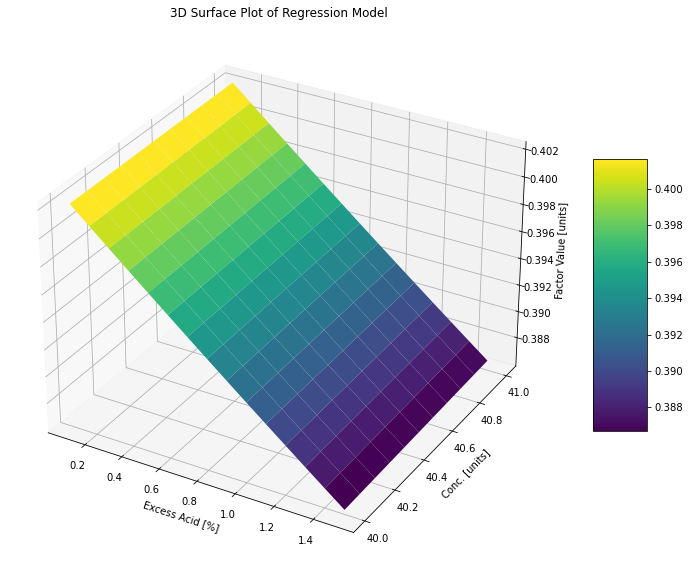

In [15]:
# Reshape data for 3D surface plotting
# Create grid for the mesh
x = melted_df['Excess Acid'].unique()  # Excess Acid values (rows)
y = melted_df['Conc.'].unique()  # Conc. values (columns)
X, Y = np.meshgrid(x, y)

# Get the 'Factor Value' for each pair (Excess Acid, Conc.)
Z = np.array(melted_df.pivot_table(index='Conc.', columns='Excess Acid', values='Factor Value'))

# Create 3D plot
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Add labels and title
ax.set_xlabel('Excess Acid [%]')
ax.set_ylabel('Conc. [units]')
ax.set_zlabel('Factor Value [units]')
ax.set_title('3D Surface Plot of Regression Model')

# Add colour bar
fig.colorbar(surf, shrink=0.5, aspect=5)

# Show plot
plt.show()

## User Input

This section has been commented-out but can be used to enter in a value of Excess Acid and Strength to determine the Factor Value.

In [16]:
# This can be used to calculated predicted values of the factor, based on input excess acid and strength.

#excess_acid = float(input('Enter excess acid value...'))

#strength = float(input('Enter strength value...'))

#factor_value = coefficients[0] + (coefficients[1] * excess_acid) + (coefficients[2] * strength)

#print(factor_value)

## Error Calculation

This section populates the original table with the predicted values, such that an absolute and percentage error can be calculated for the model.

In [17]:
melted_df['Predicted Factor Value'] = coefficients[0] + (coefficients[1] * melted_df['Excess Acid']) + (coefficients[2] * melted_df['Conc.'])

melted_df['Error [actual]'] = abs(melted_df['Factor Value'] - melted_df['Predicted Factor Value'])

melted_df['Error [%]'] = 100 * melted_df['Error [actual]'] / melted_df['Factor Value']

print(melted_df)


     Excess Acid  Conc.  Factor Value  Predicted Factor Value  Error [actual]  \
0            0.1   40.0      0.402186                0.401991        0.000195   
1            0.2   40.0      0.400996                0.400859        0.000138   
2            0.3   40.0      0.399813                0.399726        0.000087   
3            0.4   40.0      0.398637                0.398594        0.000043   
4            0.5   40.0      0.397468                0.397462        0.000007   
..           ...    ...           ...                     ...             ...   
160          1.1   41.0      0.390897                0.390888        0.000009   
161          1.2   41.0      0.389800                0.389756        0.000044   
162          1.3   41.0      0.388710                0.388624        0.000086   
163          1.4   41.0      0.387625                0.387491        0.000134   
164          1.5   41.0      0.386546                0.386359        0.000187   

     Error [%]  
0     0.04

In [18]:
# Calculate the mean error for the predictive model.
mean_error = st.mean(melted_df['Error [%]'])

# Calculate the median error for the predictive model.
median_error = st.median(melted_df['Error [%]'])

print(f'Mean error = ' + str(round(mean_error,3)) + '%.')
print(f'Median error = ' + str(round(median_error,3)) + '%.')

Mean error = 0.013%.
Median error = 0.012%.
